In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import re #regular expression matching operations

import folium #maping crime on the map
from folium.plugins import HeatMap, MarkerCluster #making maping visually appealing

%matplotlib inline

In [2]:
crime = pd.read_csv('MCI_2014_to_2019.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'MCI_2014_to_2019.csv'

In [3]:
crime["datetime"] = pd.to_datetime(crime["occurrencedate"])

crime['year'] = crime['datetime'].dt.year
crime['month'] = crime['datetime'].dt.month
crime['dayofweek'] = crime['datetime'].dt.dayofweek
crime['hour'] = crime['datetime'].dt.hour
crime["MCI"] = crime["MCI"].astype('category')

In [4]:
values_crime = crime["MCI"].value_counts() 
labels_crime = crime["MCI"].value_counts().keys()

In [5]:
crime_assault = crime[crime["offence"].str.contains('ASSAULT', flags=re.IGNORECASE, regex=True)] #Step 1.

values_assault = crime_assault["offence"].value_counts() #Step 2.

for key,value in values_assault.iteritems(): #Step 3.
    if value < 1500:
       values_assault= pd.DataFrame(values_assault.rename({key: "other"}))


values_assault=values_assault.groupby(values_assault.index).sum().sort_values("offence",ascending=False) #Step 4.

labels_assault = values_assault.index #Step 5.

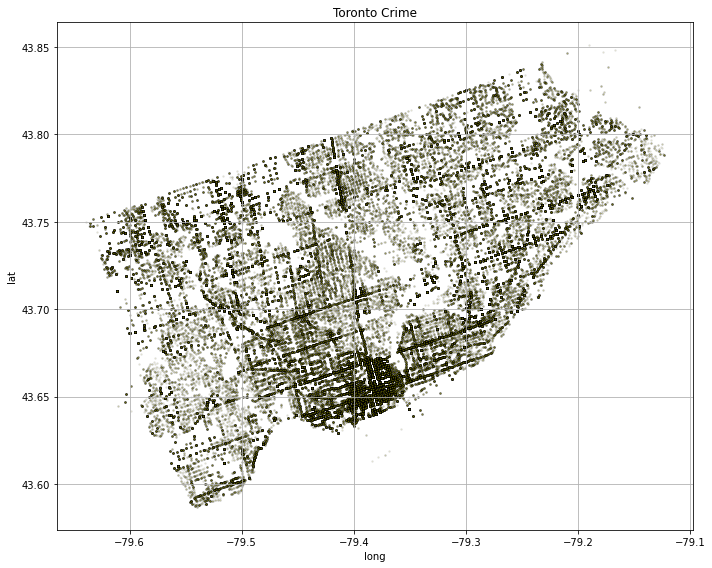

In [6]:
plt.figure(num=None, figsize=(10, 8))
plt.scatter("Long", "Lat", data = crime, c = 'y',alpha = 0.1, edgecolor = 'black', s=2)
plt.grid()
plt.xlabel('long')
plt.ylabel('lat')
plt.title('Toronto Crime')
plt.tight_layout()
plt.axis('tight')

plt.show()

In [7]:
# Top N Criminal Neighbourhoods in Toronto 
top_N = crime.groupby('Neighbourhood')[['MCI']].count().sort_values(by=['MCI'])


# Coordinates Criminal Neighbourhoods
map_data = crime[['Neighbourhood', 'Lat', 'Long']].drop_duplicates('Neighbourhood').set_index('Neighbourhood') \
    .join(top_N, how='inner')

In [8]:
map_data.sort_values(by=['MCI'], ascending=False).head(10)

,Lat,Long,MCI
Neighbourhood,,,
Waterfront Communities-The Island (77),43.650761,-79.359757,7747
Bay Street Corridor (76),43.649895,-79.380806,6817
Church-Yonge Corridor (75),43.665844,-79.384956,6232
West Humber-Clairville (1),43.710690,-79.611321,5702
Moss Park (73),43.660946,-79.373566,4786
York University Heights (27),43.762604,-79.493645,3989
Downsview-Roding-CFB (26),43.720917,-79.508636,3974
Kensington-Chinatown (78),43.658955,-79.394684,3823
Woburn (137),43.765942,-79.225029,3798


In [9]:
# Mapping Criminal Neighbourhoods
m = folium.Map(
    location=[43.702270, -79.366074],
    zoom_start=11
)

#Step 1: Clusters
cluster = MarkerCluster().add_to(m)

#Step 2: Clusters breaking into Markers
for x in map_data.iterrows():
    folium.Marker([x[1].Lat, x[1].Long]).add_to(cluster)
    
#Step 3: Heat
max_crime = map_data['MCI'].max() # max value as reference for the darkets shade

heat = HeatMap(map_data.values,
                min_opacity=0.2,
                max_val=max_crime,
                radius=30, blur=20, 
                max_zoom=11)

heat.add_to(m)

m # call m to see the heat map with clusters

C:\Users\agnid\AppData\Local\Temp/ipykernel_12916/770776448.py:17: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heat = HeatMap(map_data.values,
